# Energy production from 1970 to 2010

We investigate the energy production data provided by 

https://www.gapminder.org/data/

********************
to answer the following questions:

1. **What is energy production distributed by country between 1970 and 2010?**

2. **Do oil and gas control the total energy production of the world?**

3. **How energy production has varied over time between 1970 and 2010?**


********************

## Data


**Energy production, total**

Description: Energy production refers to forms of primary energy petroleum (crude oil, natural gas liquids, and 
Oil from nonconventional sources), natural gas, solid fuels (coal, lignite and other derived fuels), and combustible 
renewables and waste— and primary electricity, all converted into tonnes of oil equivalents, counted in tonnes 
of oil equivalent (thousand of tonnes oil equivalent).

https://data.worldbank.org/indicator/EG.EGY.PROD.KT.OE

**Oil production, total**

Description: Total amount of crude oil production (tonnes oil equivalent)

https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html


**Natural gas production, total**

Description: Natural gas production (tonnes oil equivalent)

https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html



# Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df_total = pd.read_csv('energy_production_total.csv', index_col='country')*1000 # The 1000 unit conversion into toe (tonnes of oil equivalent)
df_oil = pd.read_csv('oil_production_total.csv', index_col='country')
df_gas = pd.read_csv('natural_gas_production_total.csv', index_col='country')
#df_hydro = pd.read_csv('hydro_power_generation_total.csv', index_col='country')
#df_nuclear = pd.read_csv('nuclear_power_generation_total.csv', index_col='country')

In [3]:
# All notebooks follow this pattern, missing values correspont to early years and year 2010.
df_total.head(2)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,883000.0,959000.0,1050000.0,1150000.0,1170000.0,1190000.0,1060000.0,1150000.0,1250000.0,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137000000.0,143000000.0,155000000.0,158000000.0,167000000.0,165000000.0,164000000.0,162000000.0,152000000.0,NaN


### Inspecting missing values

In [4]:
# Most total energy data has only 7 missing values
frame=df_total
frame.isnull().sum(axis=1).describe(), frame.columns[0], frame.columns[-1]

(count    133.000000
 mean      13.593985
 std       10.249196
 min        0.000000
 25%       12.000000
 50%       12.000000
 75%       12.000000
 max       43.000000
 dtype: float64, '1960', '2010')

In [5]:
# Most gas energy data has only 6 missing values
frame=df_gas
frame.isnull().sum(axis=1).describe(), frame.columns[0], frame.columns[-1]

(count    49.000000
 mean      3.857143
 std       7.547074
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       6.000000
 max      39.000000
 dtype: float64, '1970', '2016')

In [6]:
# Most oil energy data has only 7 missing values
frame=df_oil
frame.isnull().sum(axis=1).describe(), frame.columns[0], frame.columns[-1]

(count    49.000000
 mean      6.489796
 std      11.530977
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       7.000000
 max      47.000000
 dtype: float64, '1965', '2016')

**Insights:**

1. All data frame have data from 1965 till 2010
2. Most missing data (>75%) occurs before 1972

### Wrangling and handling missing values

In [7]:
# In view of the above observations we are going to focus on studying the following values
bin_edges = [1974+3*i for i in range(13)]
bin_names = [str(i)[-2:]+'-'+str(i+2)[-2:] for i in bin_edges[:-1]]
bin_names

['74-76',
 '77-79',
 '80-82',
 '83-85',
 '86-88',
 '89-91',
 '92-94',
 '95-97',
 '98-00',
 '01-03',
 '04-06',
 '07-09']

In [8]:
def wrangle_handle_missing(df):
    
    aux = df.rename(columns=lambda x: int(x)) # numeric column names    
    aux=aux.T # exchange rows and columns
    aux=aux.rename(columns=lambda x: x.strip().lower().replace(" ", "_")) #uniform names convention
    
    aux = aux.reset_index().rename(columns = {'index': 'year'}) # reset index, rename year
    aux['period'] = pd.cut(aux['year'], bin_edges, labels=bin_names) # create bin years
    aux=aux.groupby('period').sum().drop(columns=['year']) # group by energy on bin years    
    if aux.isnull().sum().sum() != 0: print('There are missing values') #check there are not NaNs
        
    return aux

In [9]:
df_total = wrangle_handle_missing(df_total)
df_oil = wrangle_handle_missing(df_oil)
df_gas = wrangle_handle_missing(df_gas)

In [10]:
cols = df_total.sum(0).sort_values(ascending=False).index # Countries order according to total production

df_total = df_total.reindex(cols, axis=1) # Sort columns according to cols list
df_oil = df_oil.reindex(cols, axis=1) # Sort columns according to cols list
df_gas = df_gas.reindex(cols, axis=1) # Sort columns according to cols list

In [11]:
# Some countries were funded recently, hence their missing values appear before 1990ish
df_total.head(6)

country,united_states,china,russia,saudi_arabia,canada,india,iran,united_kingdom,mexico,indonesia,...,armenia,eritrea,lebanon,jordan,namibia,luxembourg,moldova,cyprus,singapore,malta
period,,,,,,,,,,,,,,,,,,,,,
74-76,4.280000e+09,1.565000e+09,0.000000e+00,1.284000e+09,560000000.0,510000000.0,899000000.0,397000000.0,210100000.0,318300000.0,...,0.0,0.0,534000.0,2794.0,0.0,34370.0,0.0,22120.0,0.0,0.0
77-79,4.550000e+09,1.839000e+09,0.000000e+00,1.468000e+09,608000000.0,546000000.0,529800000.0,558000000.0,356000000.0,368000000.0,...,0.0,0.0,534000.0,2079.0,0.0,79700.0,0.0,22840.0,0.0,0.0
80-82,4.550000e+09,1.919000e+09,0.000000e+00,1.176000e+09,611000000.0,633000000.0,342400000.0,662000000.0,560000000.0,361000000.0,...,0.0,0.0,489000.0,3032.0,0.0,87400.0,0.0,17820.0,0.0,0.0
83-85,4.720000e+09,2.224000e+09,0.000000e+00,7.510000e+08,710000000.0,723000000.0,345000000.0,690000000.0,570000000.0,401000000.0,...,0.0,0.0,463000.0,19040.0,0.0,87700.0,0.0,20080.0,0.0,0.0
86-88,4.830000e+09,2.462000e+09,0.000000e+00,8.470000e+08,800000000.0,814000000.0,414000000.0,685000000.0,572000000.0,426000000.0,...,0.0,0.0,464000.0,98200.0,0.0,105400.0,0.0,18540.0,0.0,0.0
89-91,4.940000e+09,2.693000e+09,3.650000e+09,1.316000e+09,853000000.0,900000000.0,577000000.0,638000000.0,599000000.0,540000000.0,...,535000.0,708000.0,461000.0,492000.0,429000.0,104900.0,181800.0,17170.0,0.0,0.0


In [12]:
def handling_new_countries(df_0):  
    df= df_0[df_0!=0] # replacing 0's with NaNs
    for i in df.columns:
        aux = df[i].min() 
        df[i].fillna(aux, inplace=True) # replacing NaNs with country min
    return df

In [13]:
df_total = handling_new_countries(df_total)
df_oil = handling_new_countries(df_oil)
df_gas = handling_new_countries(df_gas)

In [14]:
df_oil.head()

country,united_states,china,russia,saudi_arabia,canada,india,iran,united_kingdom,mexico,indonesia,...,armenia,eritrea,lebanon,jordan,namibia,luxembourg,moldova,cyprus,singapore,malta
period,,,,,,,,,,,,,,,,,,,,,
74-76,1.391000e+09,257900000.0,9.140000e+08,1.264000e+09,232500000.0,27140000.0,852000000.0,52070000.0,139400000.0,226900000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77-79,1.441000e+09,316000000.0,9.140000e+08,1.422000e+09,244800000.0,33500000.0,499200000.0,212400000.0,254400000.0,240600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80-82,1.443000e+09,309000000.0,9.140000e+08,1.086000e+09,228600000.0,60300000.0,309200000.0,307500000.0,426000000.0,217300000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83-85,1.477000e+09,371000000.0,1.103000e+09,6.440000e+08,255200000.0,90000000.0,316000000.0,381000000.0,431000000.0,211600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86-88,1.355000e+09,409000000.0,1.690000e+09,7.690000e+08,278000000.0,97400000.0,378000000.0,328700000.0,429000000.0,208700000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merging

In [15]:
aux=df_total 
aux['energy_source']= ['total']* len(aux)
df_total=aux.set_index('energy_source',append=True)

In [16]:
aux=df_oil
aux['energy_source']= ['oil']* len(aux)
df_oil=aux.set_index('energy_source',append=True)

In [17]:
aux=df_gas
aux['energy_source']= ['gas']* len(aux)
df_gas=aux.set_index('energy_source',append=True)

In [18]:
df_total = df_total.reset_index().set_index(['energy_source','period'],  drop=True) 
df_oil = df_oil.reset_index().set_index(['energy_source','period'],  drop=True) 
df_gas = df_gas.reset_index().set_index(['energy_source','period'],  drop=True) 

In [19]:
df = df_total.append([df_oil,df_gas])

In [44]:
#Example of handling
df.united_kingdom.loc[('total','74-76')]

397000000.0

# Analysis

## What is energy production distributed by country between 1970 and 2010?

### Distribution of the total production of energy in the period 1974-2009

To answer this question we shall study the histograms, i.e. we shall group countries that 
produce similar amounts total energy. 

Let us start by studying the distribution obtained by summing over the total energy production in the complete
period 1974-2009, this is let us group into total energy producec bins.

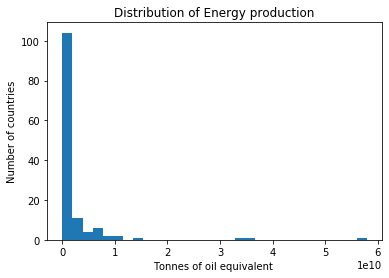

In [22]:
plt.hist(df.loc[('total')].sum(axis=0) , bins= 30);
plt.title("Distribution of Energy production")
plt.xlabel("Tonnes of oil equivalent ")
plt.ylabel("Number of countries");

**Insight: The distribution is very left skewed, i.e. few countries produce > 1e10 toe (tonnes of oil equivalent). Succintly, this means that much countries produce very little energy, and a few.**

Since this plot is so skewed, it makes sense to look at separately at countries that produce very less 
than certain % and otherwise separately. 

In [23]:
# Total energy percentage produced by each country between 1974 adn 2009
total_percentage = (df.loc[('total')].sum(axis=0)/ df.loc[('total')].sum(axis=0).sum()*100)

To decide on a percentage we look at the meadian:

In [53]:
total_percentage.median()

0.12703444480946094

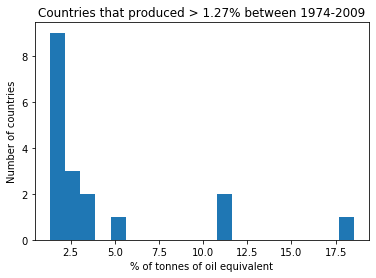

In [50]:
plt.hist(total_percentage[total_percentage>1.27] , bins= 20);
plt.title("Countries that produced > 1.27% between 1974-2009")
plt.xlabel("% of tonnes of oil equivalent")
plt.ylabel("Number of countries");

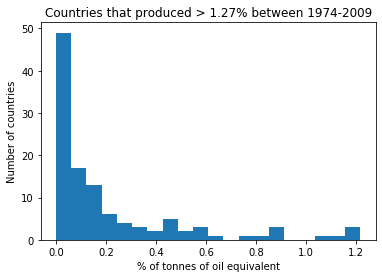

In [49]:
plt.hist(total_percentage[total_percentage<1.27] , bins= 20);
plt.title("Countries that produced > 1.27% between 1974-2009")
plt.xlabel("% of tonnes of oil equivalent")
plt.ylabel("Number of countries");

**Incredible 3 countries produced 1/3 of the energy bettween 1974-2009**  

**Conclusion: the production of energy is left very skewed distribution, even if we zoom into the distributoin. Potentially this means that the distriution might be approximately a Poisson distribution, with small lambda value.**


Now that we now the shape of the distibution on the complete period let us look at how it has varied over time. 
For this sake, we shall look at the same histogram, but rather than summing the production over 1974-2009, we look at three periods: 1974-1976, 1992-1994 and 2007-2009 

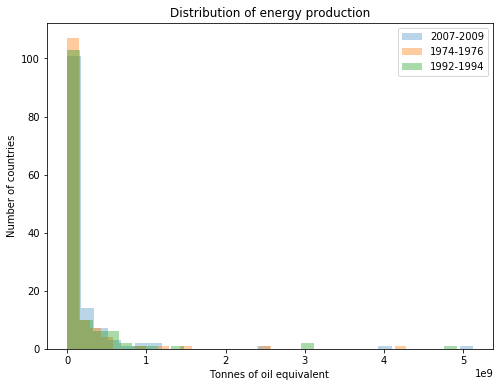

In [114]:
# Let us look at the period 1974-1976 and pediod 2007-2009
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(df.loc[('total','07-09')] , bins= 30, alpha=0.3);
plt.hist(df.loc[('total','74-76')] , bins= 30, alpha=0.4);
plt.hist(df.loc[('total','92-94')] , bins= 30, alpha=0.4);

ax.legend([ "2007-2009","1974-1976", "1992-1994"]);

plt.title("Distribution of energy production")
plt.xlabel("Tonnes of oil equivalent ")
plt.ylabel("Number of countries");

**Inisght: The shape of the distribution is the same appears to be visualy the same.**

### Top five countries that produced more energy

Let us look at which countries produce the most energy, in this same time periods to 
know if there are the same

In [61]:
#Between 1992-1994
df.loc[('total', '74-76')].sort_values(ascending = False)[:5]

country
united_states    4.280000e+09
russia           2.430000e+09
china            1.565000e+09
saudi_arabia     1.284000e+09
iran             8.990000e+08
Name: (total, 74-76), dtype: float64

In [62]:
#Between 2007-2009
df.loc[('total', '07-09')].sort_values(ascending = False)[:5]

country
united_states    5.130000e+09
china            4.080000e+09
russia           2.430000e+09
canada           1.192000e+09
saudi_arabia     1.107000e+09
Name: (total, 07-09), dtype: float64

In [63]:
#Between 2007-2009
df.loc[('total', '07-09')].sort_values(ascending = False)[:5]

country
united_states    5.130000e+09
china            4.080000e+09
russia           2.430000e+09
canada           1.192000e+09
saudi_arabia     1.107000e+09
Name: (total, 07-09), dtype: float64

In [64]:
#Total
df.loc[('total')].sum(axis=0).sort_values(ascending = False)[:10]

country
united_states     5.789000e+10
china             3.543500e+10
russia            3.404700e+10
saudi_arabia      1.538800e+10
canada            1.093600e+10
india             1.071400e+10
iran              7.783200e+09
united_kingdom    7.758000e+09
mexico            6.931100e+09
indonesia         6.796300e+09
dtype: float64

Indeed, they are! The following plot shows visually which are the countries that have contributed the most.

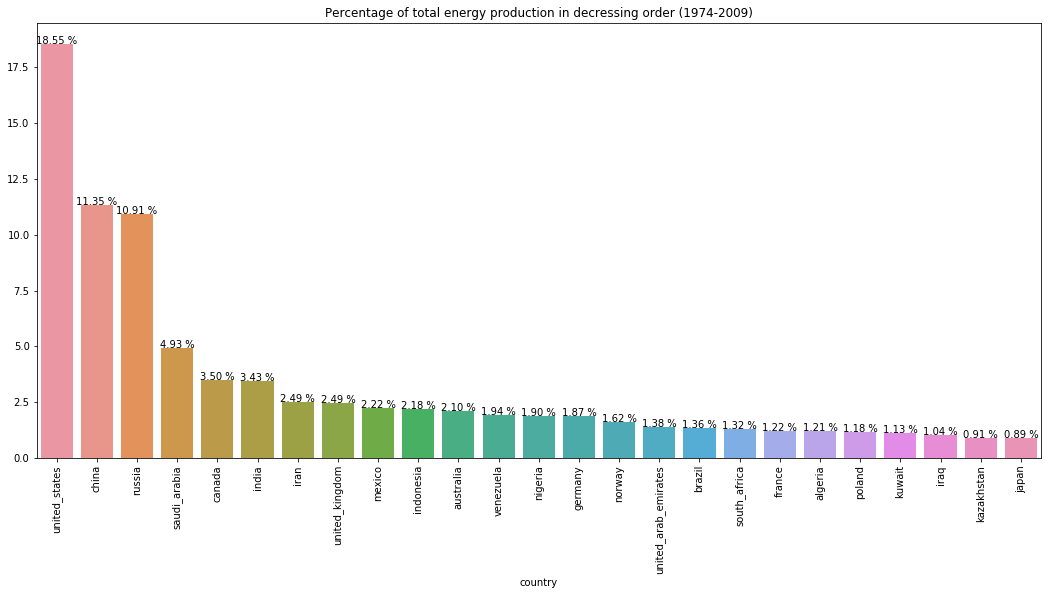

In [68]:
cols= total_percentage.sort_values(ascending=False)[:25];
fig = plt.figure(figsize=(18,8))
ax = sns.barplot(cols.index, cols.values);
ax.set_title('Percentage of total energy production in decressing order (1974-2009)')
for p in ax.patches:
    height = p.get_height();
    ax.text(p.get_x()+p.get_width()/2.,height ,'{:1.2f} %'.format(height), ha="center");
plt.xticks( rotation='vertical');

### 5 numbers statistics statistics

Ok, so we inspected visually the same of the distribution, 


In [30]:
df.loc[('total', '74-76')].sort_values(ascending = False).describe()

count    1.330000e+02
mean     1.447978e+08
std      4.669321e+08
min      9.550000e+02
25%      4.400000e+06
50%      1.906000e+07
75%      6.520000e+07
max      4.280000e+09
Name: (total, 74-76), dtype: float64

In [31]:
df.loc[('total', '07-09')].sort_values(ascending = False).describe()

count    1.330000e+02
mean     2.130514e+08
std      6.244945e+08
min      1.977000e+03
25%      8.060000e+06
50%      3.380000e+07
75%      1.582000e+08
max      5.130000e+09
Name: (total, 07-09), dtype: float64

**Insights: The total energy production in '74-76' and in '07-09': mean,std max, 75, 50 quantiles have increased by a factor smaller than 10 while the min and 25 decressed by a factor of 10.**

## What is the role that oil and gas play?

Before we continue this question, it is important to study the distribution of oil and gas like we did 
for the total energy in the previous section. 

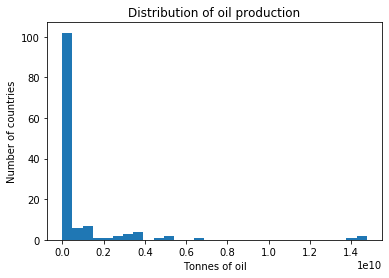

In [32]:
plt.hist(df.loc[('oil')].sum(axis=0) , bins= 30);
plt.title("Distribution of oil production")
plt.xlabel("Tonnes of oil")
plt.ylabel("Number of countries");

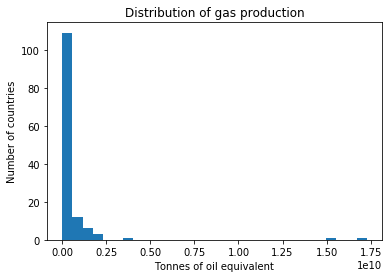

In [33]:
plt.hist(df.loc[('gas')].sum(axis=0) , bins= 30);
plt.title("Distribution of gas production")
plt.xlabel("Tonnes of oil equivalent")
plt.ylabel("Number of countries");

**These two plots show that the distirubtion of oil and gas production by country also is very left skewed and possibly can be approximately by a poisson distribution as well.**

A visual manner in which we can compare the skeness of total, gas and oil production is through their respective boxplot which also reafirm our idea that the exponential decay occurs at a lower pase than the normal distribution 
decay.

([<matplotlib.axis.XTick at 0x1a19222748>,
 <a list of 3 Text xticklabel objects>)

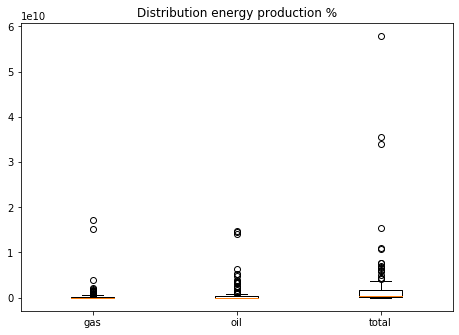

In [75]:
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot([df.loc[('gas')].sum(axis=0), df.loc[('oil')].sum(axis=0), df.loc[('total')].sum(axis=0)  ])
plt.title("Distribution energy production %")
plt.xticks((1,2,3), ["gas","oil","total"])

**Insight: These box plot further show us visually how left skew the distributions actually are.**

In [36]:
df.loc[('total')].sum(axis=0).sort_values(ascending = False)[:10]

country
united_states     5.789000e+10
china             3.543500e+10
russia            3.404700e+10
saudi_arabia      1.538800e+10
canada            1.093600e+10
india             1.071400e+10
iran              7.783200e+09
united_kingdom    7.758000e+09
mexico            6.931100e+09
indonesia         6.796300e+09
dtype: float64

In [37]:
df.loc[('oil')].sum(axis=0).sort_values(ascending = False)[:10]

country
saudi_arabia            1.474600e+10
united_states           1.458100e+10
russia                  1.403200e+10
iran                    6.403400e+09
mexico                  5.150800e+09
china                   5.134900e+09
venezuela               4.904300e+09
canada                  3.908300e+09
united_arab_emirates    3.784500e+09
nigeria                 3.474000e+09
dtype: float64

In [38]:
df.loc[('gas')].sum(axis=0).sort_values(ascending = False)[:10]

country
united_states     1.727400e+10
russia            1.513500e+10
canada            3.854800e+09
netherlands       2.166700e+09
united_kingdom    1.991300e+09
algeria           1.739040e+09
indonesia         1.557000e+09
iran              1.494770e+09
turkmenistan      1.398600e+09
norway            1.373290e+09
dtype: float64

# Energy production through changes throught years 1974 and 2019

In this section we shall further explore the following questions 2 and 3:

#### Do oil and gas control the total energy production of the world?
#### How energy production has varied over time between 1970 and 2010?

For this purpose let us first look at the scatter, line plot that illustrates the 
global total production of energy between 1974-2009 in periods of three three years

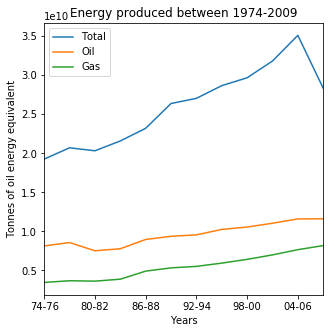

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
df.sum(axis=1)['total'].plot()
df.sum(axis=1)['oil'].plot()
df.sum(axis=1)['gas'].plot()
plt.title('Energy produced between 1974-2009')
ax.legend([ "Total","Oil","Gas"]);
plt.xlabel("Years")
plt.ylabel("Tonnes of oil energy equivalent");

**Insights:**
- **Un/Surprinsinly, up to fluctuations araound 1984, the energy production of oil and gas of oil and gas always increased.**

- **Actually most energy produced does not only come from oil/gas. A pending question is what other sources produce significant energy.**

- **It would be interesting to answer why the global energy production declined from 2007-2009.**

- **Obseve that the fluctuation of oil and gas energy production in the early 80's partially explain the decline in global energy production.**

- **Observe the total energy production increasses occurs at a higher slope that it could be explain by the oil 
and gas production**

Ok, this occurs globally. But what about the countries that produce the most energy.

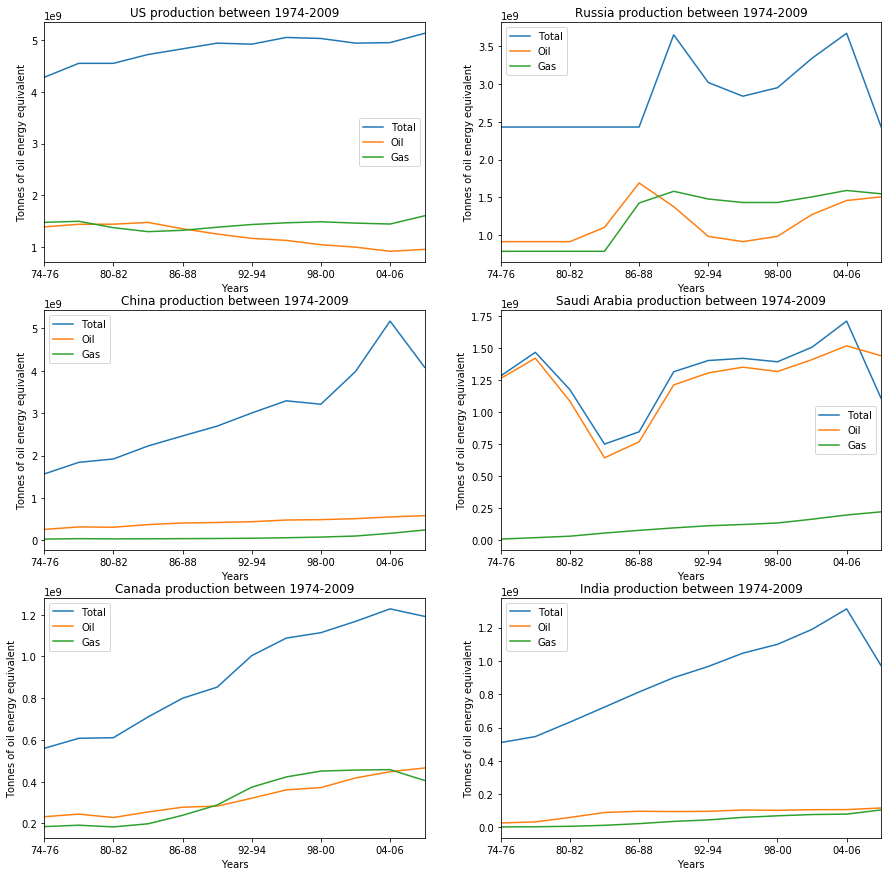

In [106]:
fig,a =  plt.subplots(3,2, figsize=(15, 15))


df.united_states['total'].plot(ax=a[0][0])
df.united_states['oil'].plot(ax=a[0][0])
df.united_states['gas'].plot(ax=a[0][0])
a[0][0].legend([ "Total","Oil","Gas"]);
a[0][0].set_title('US production between 1974-2009')
a[0][0].set_xlabel("Years")
a[0][0].set_ylabel("Tonnes of oil energy equivalent");

df.russia['total'].plot(ax=a[0][1])
df.russia['oil'].plot(ax=a[0][1])
df.russia['gas'].plot(ax=a[0][1])
a[0][1].legend([ "Total","Oil","Gas"]);
a[0][1].set_title('Russia production between 1974-2009')
a[0][1].set_xlabel("Years")
a[0][1].set_ylabel("Tonnes of oil energy equivalent");


df.china['total'].plot(ax=a[1][0])
df.china['oil'].plot(ax=a[1][0])
df.china['gas'].plot(ax=a[1][0])
a[1][0].legend([ "Total","Oil","Gas"]);
a[1][0].set_title('China production between 1974-2009')
a[1][0].set_xlabel("Years")
a[1][0].set_ylabel("Tonnes of oil energy equivalent");


df.saudi_arabia['total'].plot(ax=a[1][1])
df.saudi_arabia['oil'].plot(ax=a[1][1])
df.saudi_arabia['gas'].plot(ax=a[1][1])
a[1][1].legend([ "Total","Oil","Gas"]);
a[1][1].set_title('Saudi Arabia production between 1974-2009')
a[1][1].set_xlabel("Years")
a[1][1].set_ylabel("Tonnes of oil energy equivalent");

df.canada['total'].plot(ax=a[2][0])
df.canada['oil'].plot(ax=a[2][0])
df.canada['gas'].plot(ax=a[2][0])
a[2][0].legend([ "Total","Oil","Gas"]);
a[2][0].set_title('Canada production between 1974-2009')
a[2][0].set_xlabel("Years")
a[2][0].set_ylabel("Tonnes of oil energy equivalent");


df.india['total'].plot(ax=a[2][1])
df.india['oil'].plot(ax=a[2][1])
df.india['gas'].plot(ax=a[2][1])
a[2][1].legend([ "Total","Oil","Gas"]);
a[2][1].set_title('India production between 1974-2009')
a[2][1].set_xlabel("Years")
a[2][1].set_ylabel("Tonnes of oil energy equivalent");


**Insights:**

**Although US, China, Canada, India are the countries which historically produced the most energy their production does not come mainly from oil and gas. On the other hand the energy production in Saudi Arabia almost exclusively come
from oil! Interestingly, we can chech that Russian energy production declined significantly in accordance with their
their political situation at the time.**

**It is interesting to note that for all these countries the fluctuations in oil and gas production through time fefinetely affect the total production of energy, but with the exception of Saudia Arabia, the total energy production not only comes from oil and gas but other sources. Also note that energy**

**Observe that the declined in energy production, between 2007-2009, we observe in the global production occur in India, China, Saudi Arabia and Russia. Was it trigger by the 2008 stocks market? If so it is ironic that the US was energy produciton was not affected.**

# Limitations

1. We only studied periods of three years, it would be interesting to know how the results above vary if we look at the flucturations yearly or for longer periods. 
2. The time series above clearly show a correlation between the fluctuations of total energy production and those of gas and oil, however clearly the latter are not enough. Hence, it is highly unlikely to make inference of the total production of energy just using this variables. 
3. We don't have information for all countries! And we barely looked at hte distribution of countries that produced 
less energy, this partly because we do not have enough sources of energy to explain how such countries produce their energy.

# Conclusions

Using the Gap Minder data for the total, oil and gas energy production by country we were able to explore the following questions thorugh descriptive statistics:


1. What is energy production distributed by country between 1974 and 2009?

2. Do oil and gas control the total energy production of the world?

3. How energy production has varied over time between 1974 and 2009?

The answer to 1) is that the distribution of total energy production has an exponential shape. The median is 1.27 toe (tonnes of oir equivalent). In fact, as the summary plots below show 50% percent of the total 
energy produce in this period comes from only 10 coutries! This pattern, left skew with exponential shape, 
of the distribution not only appears in total but also at intermidiate three years steps that we studied, 
and not only for the total energy but also fo the production of energy through oil and gas.

The insgihts we have about question 2) are that oil and gas production do not, in general, do not determine 
how much energy a country produces! To illustrate this, the histograms plots above show that only half the US energy production between 1974-2009 comes from oil + gas.

The insights we found into question 3 are the following. The global, and also by country, production of oil 
between 1974 and 2009 has increase, probably at a linear rate. The slope of the increase of the total energy production is lower than that of oil/gas. In stark contrast, Saudi Arabia production mostly come from oil. 
Globally, the slope of the increase of total energy produciton is much higher than that of oil and gas. 

Interstingly, the local/global fluctuations of total energy production and the fluctuations of gas and oil production seem to occur simultaneous. However, the absolute conclusiosn is that oil and gas productions in general do not provide enough information to predict the total energy production. 

The largest fluctuation in the production of energy occurs between 207-2009! Perhaps the reason is the crash of the stock market. 

These insights, complemented by the numerical tables and plots provided above, can serve as a starting point to any study that uses these variables, for instance the relationship of countries economy and its energy production, or the impact on enviromental polution.

For ease of use, we finally present two plots below that in roughly summarize our findings. 

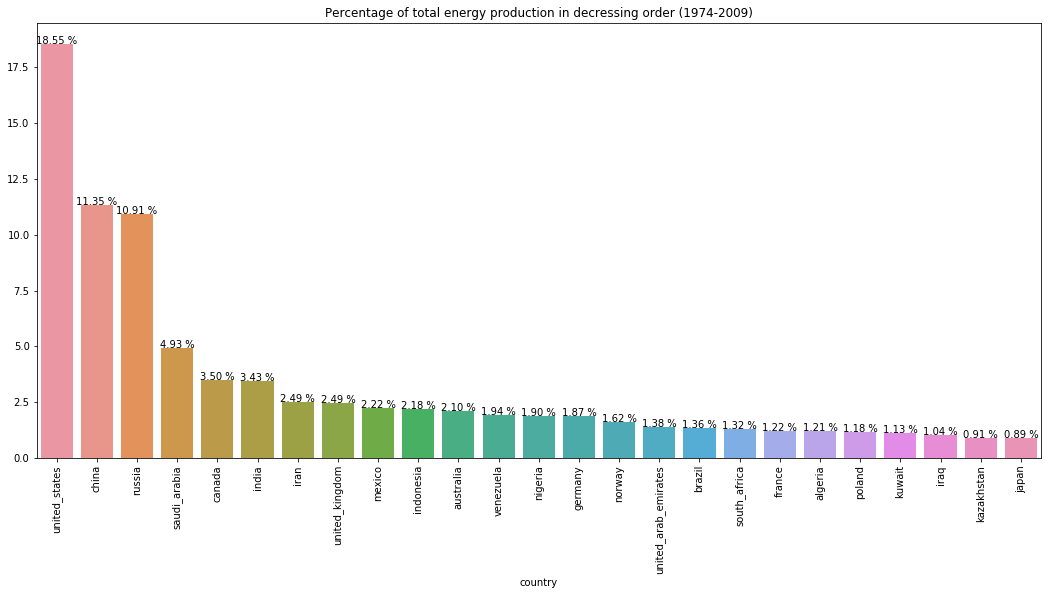

In [108]:
cols= total_percentage.sort_values(ascending=False)[:25];
fig = plt.figure(figsize=(18,8))
ax = sns.barplot(cols.index, cols.values);
ax.set_title('Percentage of total energy production in decressing order (1974-2009)')
for p in ax.patches:
    height = p.get_height();
    ax.text(p.get_x()+p.get_width()/2.,height ,'{:1.2f} %'.format(height), ha="center");
plt.xticks( rotation='vertical');

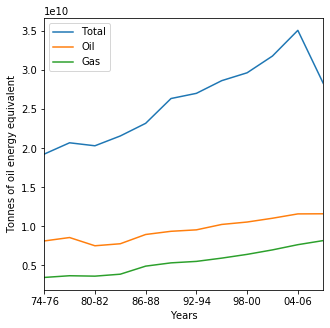

In [107]:
fig, ax = plt.subplots(figsize=(5, 5))
df.sum(axis=1)['total'].plot()
df.sum(axis=1)['oil'].plot()
df.sum(axis=1)['gas'].plot()
ax.legend([ "Total","Oil","Gas"]);
plt.xlabel("Years")
plt.ylabel("Tonnes of oil energy equivalent");